# Notebook made to test the viability of Neural Network model.

In [2]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
# from tensorflow.python.keras.metrics import metric
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

In [3]:
df=pd.read_csv("../../Data/Imputed.csv")

In [4]:
df

,HINCP,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,47900.0,3.0,350.0,6.0,75600.0,47900.0,703.8,1575.0
1,36100.0,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,100000.0,0.0,460.0,1.0,250000.0,55186.8,1443.0,6700.0
3,45000.0,2.0,516.0,5.0,134600.0,53542.0,893.6,4210.0
4,88000.0,3.0,774.0,6.0,154000.0,104880.0,1548.6,3880.0
5,56000.0,2.0,0.0,5.0,100000.0,46820.0,725.0,2150.0
6,43020.0,2.0,630.0,5.0,198200.0,8600.0,828.8,4500.0
7,35400.0,2.0,820.0,4.0,70000.0,47680.0,249.0,1050.0
8,21500.0,3.0,750.0,5.0,360000.0,207000.0,1080.0,8500.0
9,8600.0,2.0,400.0,4.0,200000.0,47680.0,666.0,4050.0


In [5]:
#setting our dependent and independent variables
X=df.drop("HINCP",axis=1)
y=df["HINCP"]

In [6]:
y=np.reshape(y.values,(-1,1))

In [7]:
#splitting our data once to get out train and hold out set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=2020)

C:\Users\Ice\Anaconda3\envs\NeuralNetwork\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [9]:
#fitting our standard scalar
X_train_ss=ss_x.fit_transform(X_train)

In [10]:
#fitting out minmax scalar the less complex of the two scalars
X_train_mm=mm_x.fit_transform(X_train)

In [30]:
# The R-squared predictor
from keras import backend as K
def coeff_determination(y_true, y_pred):
    """https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/"""

    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [31]:
# # First model copying this to keep for future
# model=Sequential()
# model.add(Dense(50 ,activation="relu",input_dim=47))
# model.add(Dense(25 ,activation="selu"))
# model.add(Dense(1 ,activation='linear'))
# model.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])

In [32]:
#First model
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=7))
model.add(Dense(25 ,activation="selu"))
model.add(Dense(1 ,activation='linear'))
model.compile(loss="mse",optimizer="adam",metrics=["mae",coeff_determination])


In [33]:
model1=Sequential()
model1.add(Dense(50 ,activation="relu",input_dim=7))
model1.add(Dense(25 ,activation="selu"))
model1.add(Dense(1 ,activation='linear'))
model1.compile(loss="mse",optimizer="adam",metrics=["mae",coeff_determination])


In [34]:
model2=Sequential()
model2.add(Dense(50 ,activation="relu",input_dim=7))
model2.add(Dense(25 ,activation="selu"))
model2.add(Dense(1 ,activation='linear'))
model2.compile(loss="mse",optimizer="adam",metrics=["mae",coeff_determination])


In [35]:
model2=Sequential()
model2.add(Dense(50 ,activation="relu",input_dim=7))
model2.add(Dense(25 ,activation="selu"))
model2.add(Dense(1 ,activation='linear'))
model2.compile(loss="mse",optimizer="adam",metrics=["mae",coeff_determination])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                400       
_________________________________________________________________
dense_20 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 26        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Creating early stop function to help minimize time of models
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list = [early_stop]

In [38]:
history=model.fit(X_train,y_train,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 129672 samples, validate on 32419 samples
Epoch 1/50
129672/129672 [==============================] - 2s 16us/step - loss: 11270878673.5231 - mean_absolute_error: 63539.0279 - coeff_determination: -0.4462 - val_loss: 10262214262.7491 - val_mean_absolute_error: 61270.9130 - val_coeff_determination: -0.3649
Epoch 2/50
129672/129672 [==============================] - 2s 13us/step - loss: 10699202798.7849 - mean_absolute_error: 62363.8759 - coeff_determination: -0.3629 - val_loss: 10020000256.8844 - val_mean_absolute_error: 61277.7366 - val_coeff_determination: -0.3441
Epoch 3/50
129672/129672 [==============================] - 2s 13us/step - loss: 10588910410.6726 - mean_absolute_error: 62021.3096 - coeff_determination: -0.3450 - val_loss: 10087549409.5112 - val_mean_absolute_error: 62175.2849 - val_coeff_determination: -0.3735
Epoch 00003: early stopping


In [39]:
history1=model1.fit(X_train_ss,y_train,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 129672 samples, validate on 32419 samples
Epoch 1/50
129672/129672 [==============================] - 2s 14us/step - loss: 13230483507.9573 - mean_absolute_error: 72072.2715 - coeff_determination: -0.7275 - val_loss: 9437704426.9161 - val_mean_absolute_error: 57594.6528 - val_coeff_determination: -0.2280
Epoch 2/50
129672/129672 [==============================] - 2s 13us/step - loss: 9347361611.1168 - mean_absolute_error: 58551.0697 - coeff_determination: -0.1548 - val_loss: 8623866567.3577 - val_mean_absolute_error: 57386.3362 - val_coeff_determination: -0.1171
Epoch 3/50
129672/129672 [==============================] - 2s 13us/step - loss: 8879122185.2057 - mean_absolute_error: 58082.5663 - coeff_determination: -0.0854 - val_loss: 8335408759.7678 - val_mean_absolute_error: 57104.1616 - val_coeff_determination: -0.0743
Epoch 4/50
129672/129672 [==============================] - 2s 13us/step - loss: 8689788976.5794 - mean_absolute_error: 57857.4405 - coeff_determination: -0.05

In [40]:
history2=model2.fit(X_train_mm,y_train,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 129672 samples, validate on 32419 samples
Epoch 1/50
129672/129672 [==============================] - 2s 15us/step - loss: 12960670428.5195 - mean_absolute_error: 70604.3597 - coeff_determination: -0.6873 - val_loss: 8650026913.4461 - val_mean_absolute_error: 54762.3292 - val_coeff_determination: -0.0979
Epoch 2/50
129672/129672 [==============================] - 2s 13us/step - loss: 8882947729.0947 - mean_absolute_error: 57591.3768 - coeff_determination: -0.0826 - val_loss: 8350515898.3914 - val_mean_absolute_error: 57160.8782 - val_coeff_determination: -0.0779
Epoch 3/50
129672/129672 [==============================] - 2s 13us/step - loss: 8745672295.5040 - mean_absolute_error: 57869.2240 - coeff_determination: -0.0647 - val_loss: 8247815853.7727 - val_mean_absolute_error: 56493.7538 - val_coeff_determination: -0.0574
Epoch 4/50
129672/129672 [==============================] - 2s 13us/step - loss: 8656443322.5413 - mean_absolute_error: 57638.4230 - coeff_determination: -0.04

dict_keys(['coeff_determination', 'loss', 'mean_absolute_error', 'val_loss', 'val_coeff_determination', 'val_mean_absolute_error'])


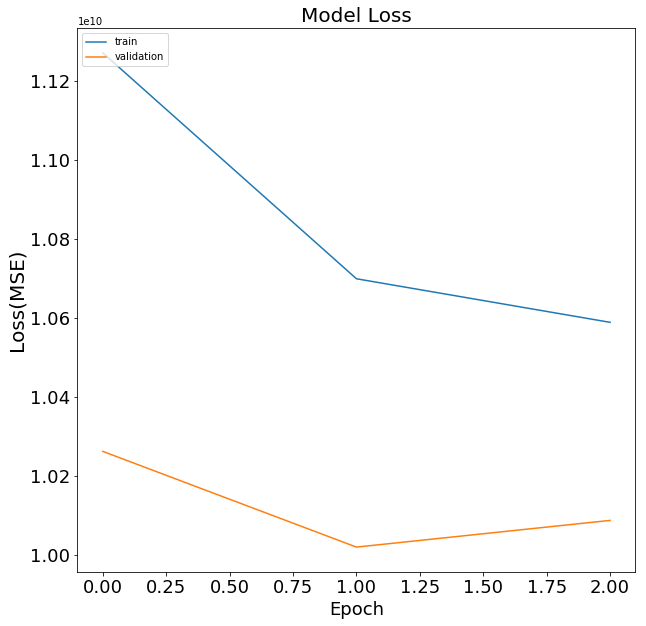

In [47]:
#plotting loss of base model
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
# plt.savefig("../../Reports/Figures/base_nnmodel_results",transparent=True,bbox_inches="tight",)
plt.show();

Look like the val data is performing better than train data so we may need to try a regularization tool to help close the gap.

dict_keys(['coeff_determination', 'loss', 'mean_absolute_error', 'val_loss', 'val_coeff_determination', 'val_mean_absolute_error'])


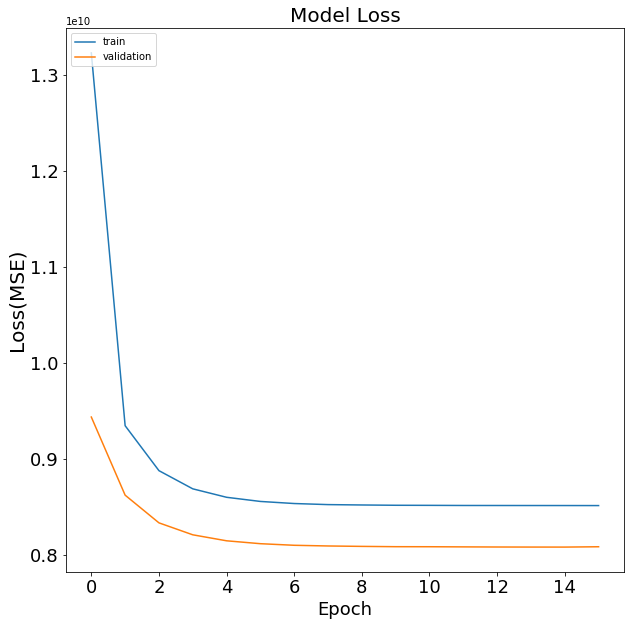

In [46]:
#plotting loss of Standard scalar
print(history1.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
# plt.savefig("../../Reports/Figures/nnmodel1_results",transparent=True,bbox_inches="tight",)
plt.show();

Now looking at the standard scalar model there is less of a gap between the train and validation set, but still  a very large mse

dict_keys(['coeff_determination', 'loss', 'mean_absolute_error', 'val_loss', 'val_coeff_determination', 'val_mean_absolute_error'])


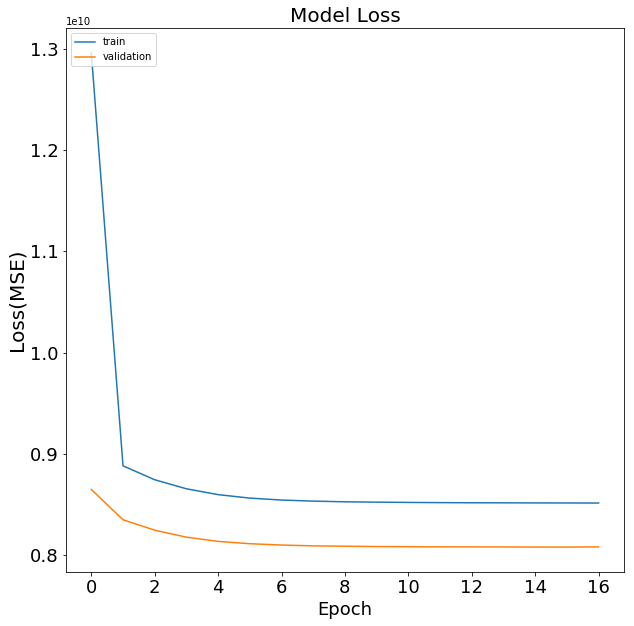

In [45]:
#plotting loss of Minmax Scalar
print(history2.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
# plt.savefig("../../Reports/Figures/nnmodel2_results",transparent=True,bbox_inches="tight",)
plt.show();

The Minmax scalar is have a similar reaction as the standard scalar where the min max between the validation and test set are close, but once again the mse is still an enormous number.

#### Next step for this is to modify variables and then the model selectors as well. Possibly add in a rsquared metric as well as modify the nodes,activation and optimizer.